In [1]:
%pip install opencv-python shapely

Defaulting to user installation because normal site-packages is not writeable
You should consider upgrading via the '/Applications/Xcode.app/Contents/Developer/usr/bin/python3 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


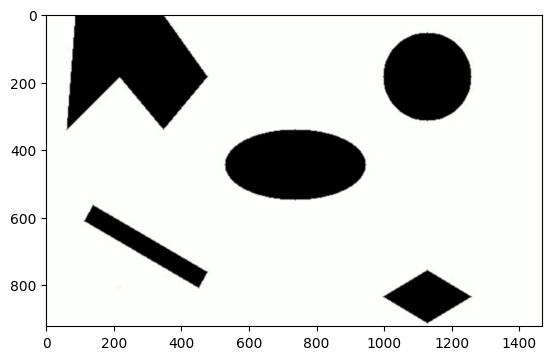

In [2]:
import matplotlib.pyplot as plt
plt.imshow(plt.imread("./generated_images/o3.png"))

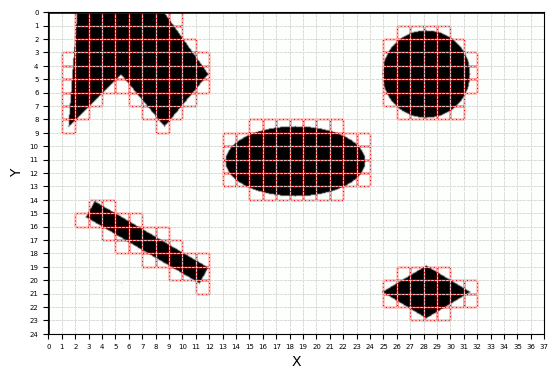

In [3]:
# Import necessary custom-built classes and methods
# from utils.obstacle_space import Map
from obstacle.obstacle_map import Map
from a_star.explorer import Explorer
from a_star.search import astar_search, path_states, dynamic_weighted_astar_search
import time

map = Map(image_path='./generated_images/o3.png', grid_size=40)
map.draw_coordinate_system()

In [4]:
initial=(0,0)
goal=(32,22)

# Initialize the explorer class
explorer = Explorer(map=map, initial=initial, goal=goal)
# Check validity of start and goal nodes

if map.is_obstacle_in_grid(initial[0], initial[1]):
    print('Start lie in obstacle space!!\nPlease try again')

if map.is_obstacle_in_grid(goal[0], goal[1]):
    print('Goal lie in obstacle space!!\nPlease try again')

Reached: 126
Elapsed Time: 0.006706953048706055 seconds
path length = 41


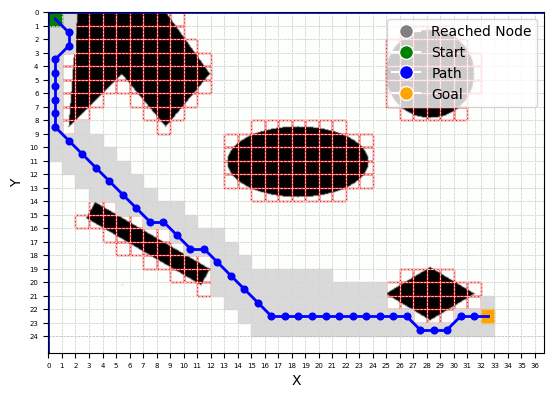

In [5]:
start_time = time.time()
node = astar_search(explorer)
end_time = time.time()
# Calculate the elapsed time
elapsed_time = end_time - start_time
print(f"Reached: {len(explorer.reached.keys())}")
print(f"Elapsed Time: {elapsed_time} seconds")

states = path_states(node)
print('path length =', len(states))
explorer.get_reached()
map.draw_path_found(states, initial, goal, explorer.get_reached())

Elapsed Time: 0.007154941558837891 seconds
path length = 41


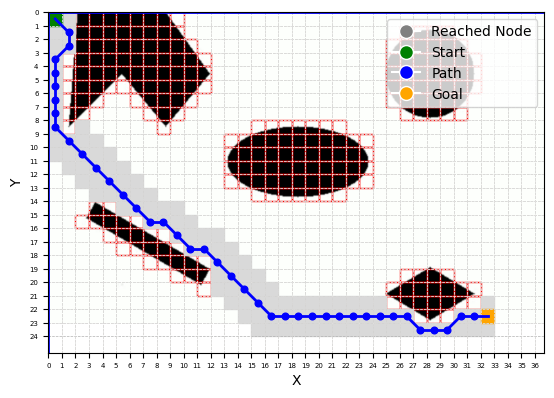

In [6]:
from math import sqrt
def h(node):
    h1 = abs(goal[0] - node.state[0])
    h2 = abs(goal[1] - node.state[1])
    return h1 + h2 + (sqrt(2) - 2) * min(h1, h2)

start_time = time.time()
node = dynamic_weighted_astar_search(explorer, h=h)
end_time = time.time()
# Calculate the elapsed time
elapsed_time = end_time - start_time
print(f"Elapsed Time: {elapsed_time} seconds")


path = path_states(node)
print('path length =', len(states))
map.draw_path_found(path, initial, goal, explorer.get_reached())

In [7]:
from path_smooth.path_smooth import simplify_path
simplified_path = simplify_path(path, map)

In [8]:
simplified_path

[(0, 0),
 array([0, 8]),
 array([0, 8]),
 array([ 6, 14]),
 array([ 6, 14]),
 array([ 8, 15]),
 array([ 8, 15]),
 array([ 9, 16]),
 array([11, 17]),
 array([11, 17]),
 array([28, 23]),
 array([29, 23]),
 array([29, 23]),
 array([31, 22]),
 array([32, 22])]

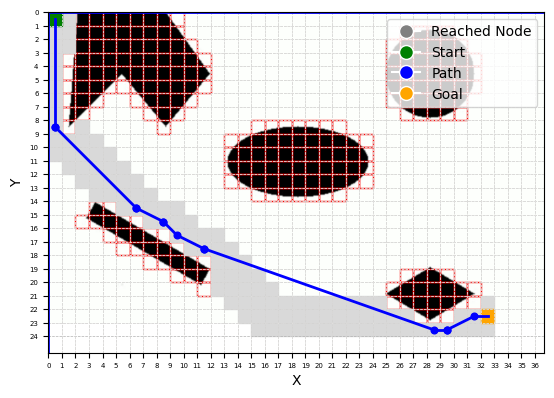

In [9]:
map.draw_path_found(simplified_path, initial, goal, explorer.get_reached())

**Genetic algorithm**

Finish Ant colony optimization, size of initial population:  354
Path grid numbers:  [  0 333 491 605 662 846]
Path grid coordinates:  [(0, 0), (0, 9), (10, 13), (13, 16), (33, 17), (32, 22)]


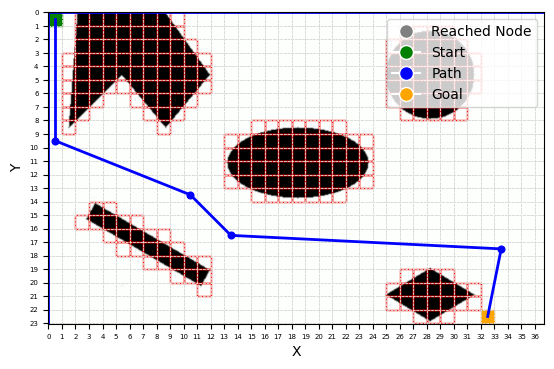

In [10]:
from genetic.genetic import genetic

path = genetic(map, start=initial, end=goal,
                max_generation=100, initial_population_size=100, 
                p_crossover=0.2, p_mutation=0.05, verbose=False)

map.draw_path_found(path, initial, goal, [])

58


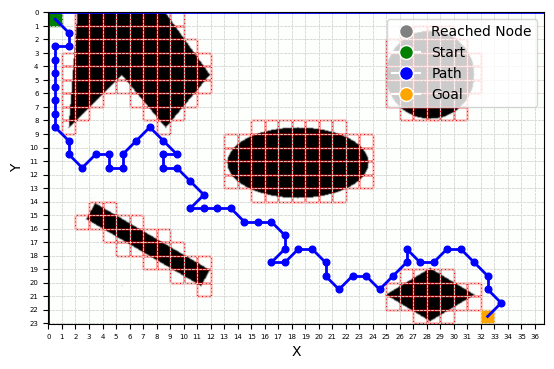

In [11]:
from genetic.mutation import mutation
from genetic.genetic import convert_path_to_xy
## After selection and crossover 
G = map.get_grid_matrix()
individual = [0, 38, 75, 74, 111, 148, 185, 222, 259, 296, 334, 371, 409, 373, 374, 411, 412, 375, 339, 303, 341, 379, 378, 415, 416, 454, 492, 528, 529, 530, 531, 569, 570, 571, 609, 646, 682, 683, 647, 648, 686, 723, 761, 725, 726, 764, 728, 692, 655, 693, 694, 658, 659, 697, 735, 772, 810, 846]

print(len(individual))
map.draw_path_found(convert_path_to_xy(individual, G.shape[1]), initial, goal, [])


[0, 38, 75, 74, 111, 148, 185, 222, 259, 296, 334, 371, 409, 373, 374, 411, 412, 375, 339, 303, 341, 379, 378, 415, 416, 454, 492, 528, 529, 530, 531, 569, 570, 571, 609, 646, 682, 683, 647, 648, 686, 723, 761, 725, 726, 764, 728, 692, 655, 693, 694, 658, 659, 697, 735, 772, 810, 846]
[0, 38, 75, 74, 111, 148, 185, 222, 259, 296, 334, 371, 409, 373, 374, 411, 412, 375, 339, 303, 341, 379, 378, 415, 416, 454, 492, 565, 529, 530, 531, 569, 570, 571, 609, 646, 682, 683, 647, 648, 686, 723, 761, 725, 726, 764, 728, 692, 655, 693, 694, 658, 659, 697, 735, 772, 810, 846]


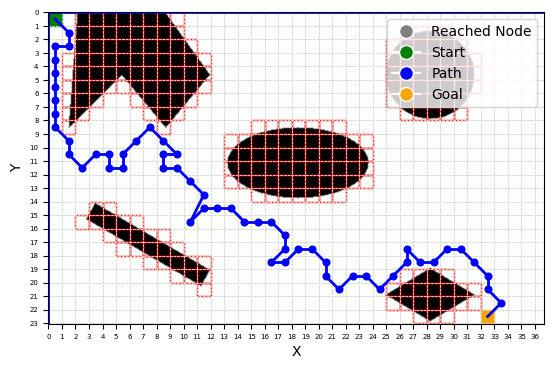

In [12]:
from genetic.mutation import mutation
mutated = mutation([individual], p_mutation=1, G=G)[0]
print(individual)
print(mutated)
map.draw_path_found(convert_path_to_xy(mutated, G.shape[1]), initial, goal, [])

[0, 38, 75, 74, 111, 148, 185, 222, 259, 296, 334, 371, 409, 373, 374, 411, 412, 375, 339, 303, 341, 379, 378, 415, 416, 454, 492, 565, 529, 530, 531, 569, 570, 571, 609, 646, 682, 683, 647, 648, 686, 723, 761, 725, 726, 764, 728, 692, 655, 693, 694, 658, 659, 697, 735, 772, 810, 846]
[0, 38, 75, 74, 111, 148, 185, 222, 259, 296, 334, 371, 409, 373, 374, 411, 412, 375, 339, 303, 341, 379, 378, 415, 416, 454, 492, 527, 565, 529, 530, 531, 569, 570, 571, 609, 646, 682, 683, 647, 648, 686, 723, 761, 725, 726, 764, 728, 692, 655, 693, 694, 658, 659, 697, 735, 772, 810, 846]


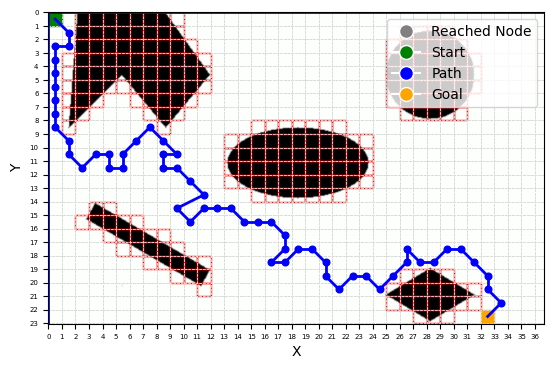

In [13]:
from genetic.insertion import insertion

inserted = insertion([mutated], G=G)[0]
print(mutated)
print(inserted)
map.draw_path_found(convert_path_to_xy(inserted, G.shape[1]), initial, goal, [])

[0, 38, 75, 74, 111, 148, 185, 222, 259, 296, 334, 371, 409, 373, 374, 411, 412, 375, 339, 303, 341, 379, 378, 415, 416, 454, 492, 527, 565, 529, 530, 531, 569, 570, 571, 609, 646, 682, 683, 647, 648, 686, 723, 761, 725, 726, 764, 728, 692, 655, 693, 694, 658, 659, 697, 735, 772, 810, 846]
[  0 296 334 339 527 609 697 735 846]


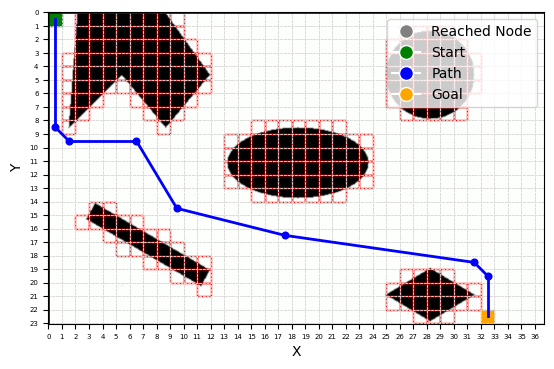

In [14]:
from genetic.deletion import deletion

deleted = deletion([inserted], map)[0]
print(inserted)
print(deleted)

map.draw_path_found(convert_path_to_xy(deleted, G.shape[1]), initial, goal, [])